<a href="https://colab.research.google.com/github/mdjubaer12/Data-Science/blob/main/Diabetes_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing Using Decision Trees**

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import sklearn.tree as tree 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data= pd.read_csv("diabetes.csv")
d=data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Getting the shape of the Dataset and the name of the columns
print(data.shape)
data.columns

(768, 9)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Data Pre-processing**

In [4]:
# Splitting Into Features and Target variables
X= data.iloc[:, :-1]
Y=data.iloc[:, -1]
print(np.shape(X))
np.shape(Y)

(768, 8)


(768,)

In [5]:
# Splitting Into Tarin and Test Dataset

X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size = 0.2, random_state=3)

In [6]:
# Getting The Shape of Train and Test Dataset
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(Y_trainset.shape))
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y Test set {}'.format(Y_testset.shape))

Shape of X training set (614, 8) &  Size of Y training set (614,)
Shape of X test set (154, 8) &  Size of Y Test set (154,)


**Now Build the Decision Tree Model**

In [7]:
DiabetesTree= DecisionTreeClassifier(criterion="entropy", max_depth=5)
DiabetesTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [8]:
DiabetesTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [9]:
pre= DiabetesTree.predict([[10,	65,	43,	12,	0,	22,	0.25, 0]])
print(pre)

[0]


/home/sajid/anaconda3/envs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Make The prediction**

In [10]:
pred= DiabetesTree.predict(X_testset)

In [11]:
# Checking The Prediction
print(pred[0:5])
print(Y_testset[0:5])

[0 1 0 1 0]
51     0
378    1
27     0
579    1
86     0
Name: Outcome, dtype: int64


**Calculating The Accuracy**

In [12]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, pred))

DecisionTrees's Accuracy:  0.7207792207792207


**Plotting The Tree**

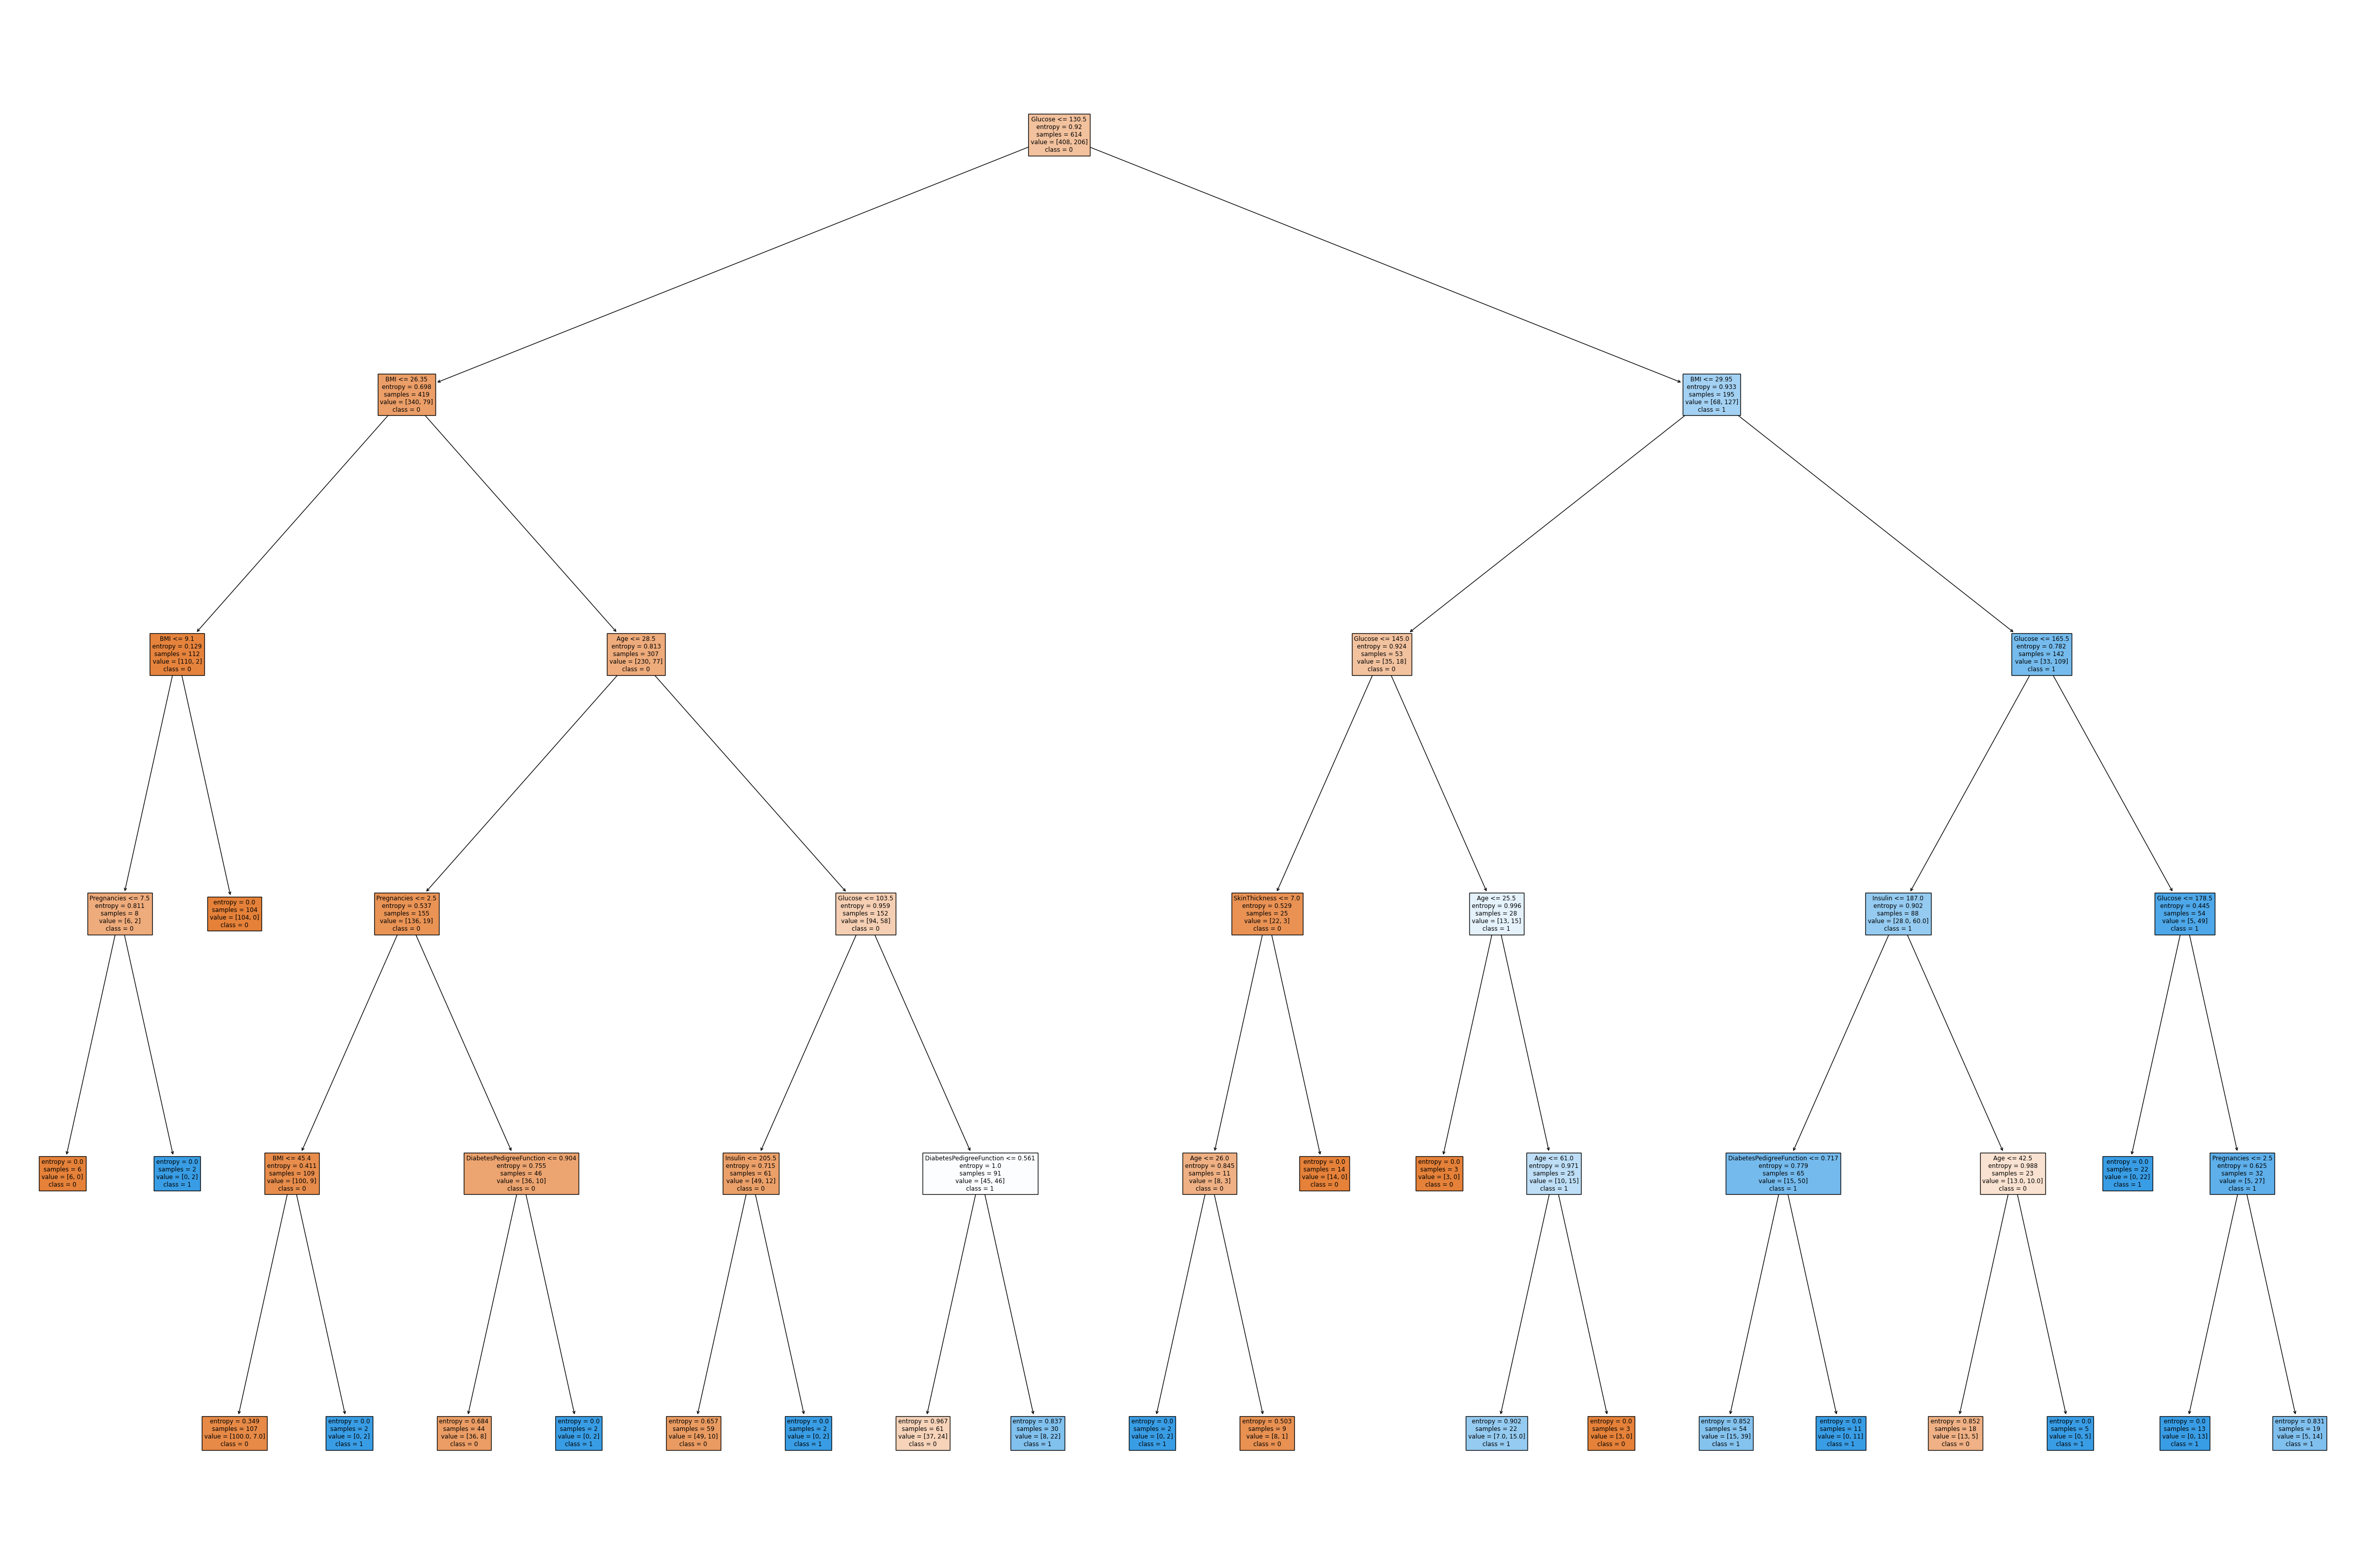

In [13]:
fig = plt.figure(figsize=(60,40))
tree.plot_tree(DiabetesTree, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], class_names=['0','1'], filled=True)
plt.show()

# **Random Forest Modeling**

In [14]:
Random_Forest= RandomForestClassifier(n_estimators = 200)
Random_Forest.fit(X_trainset, Y_trainset)


RandomForestClassifier(n_estimators=200)

**Predicting**

In [15]:
prediction= Random_Forest.predict(X_testset)

In [16]:
# Checking the prediction
print(prediction[0:5])
print(Y_testset[0:5])

[0 1 0 1 0]
51     0
378    1
27     0
579    1
86     0
Name: Outcome, dtype: int64


**Accuarcy**

In [17]:
print("Random Forest Accuracy: ", metrics.accuracy_score(Y_testset, prediction))

Random Forest Accuracy:  0.7467532467532467


# **SVM**

In [18]:
from sklearn import svm
Dia_SVM=svm.SVC(kernel='linear')
Dia_SVM.fit(X_trainset, Y_trainset)

SVC(kernel='linear')

In [19]:
# Predicting Using Test set
y_hat=Dia_SVM.predict(X_testset)
print(y_hat[0:10])
print(Y_testset[0:10])


[0 1 0 1 0 1 0 0 0 0]
51     0
378    1
27     0
579    1
86     0
144    0
65     0
617    0
10     0
522    0
Name: Outcome, dtype: int64


**Accuracy Testing**

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_testset, y_hat)

0.7272727272727273